# Predicting Toronto Ferry Activity

In [ ]:
# See Modelling_modified.ipynb for my changes to this file
from Model import RedemptionModel
import pandas as pd

In [11]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    return df_daily

In [12]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')

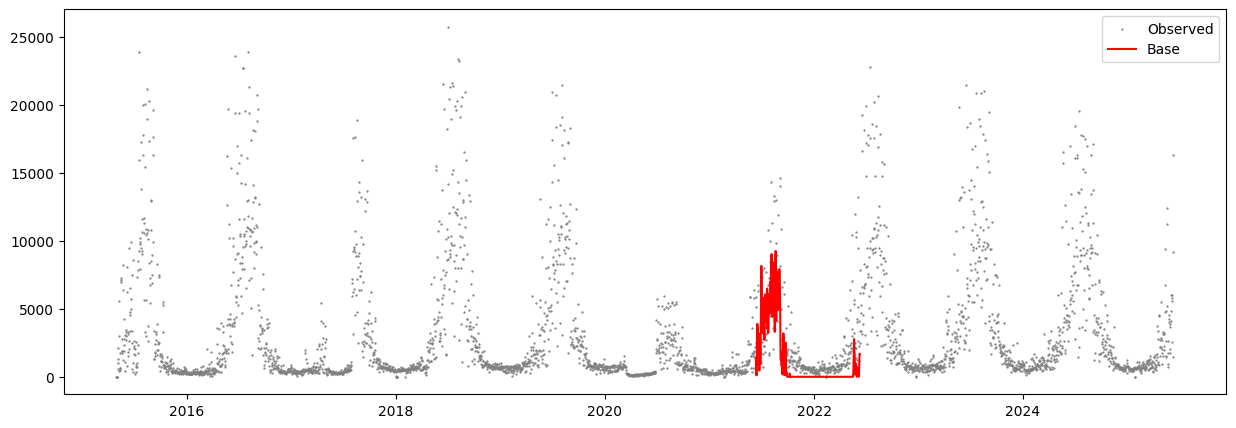

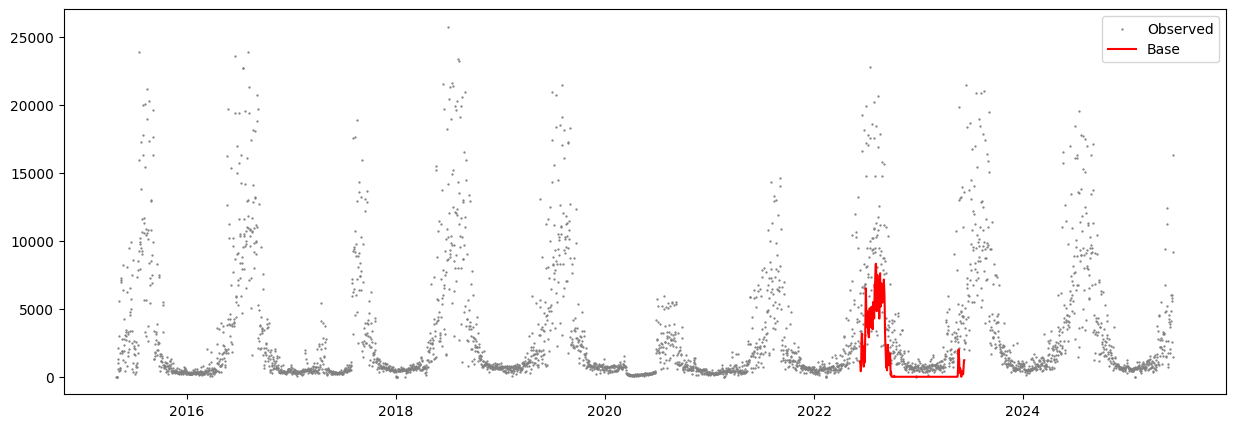

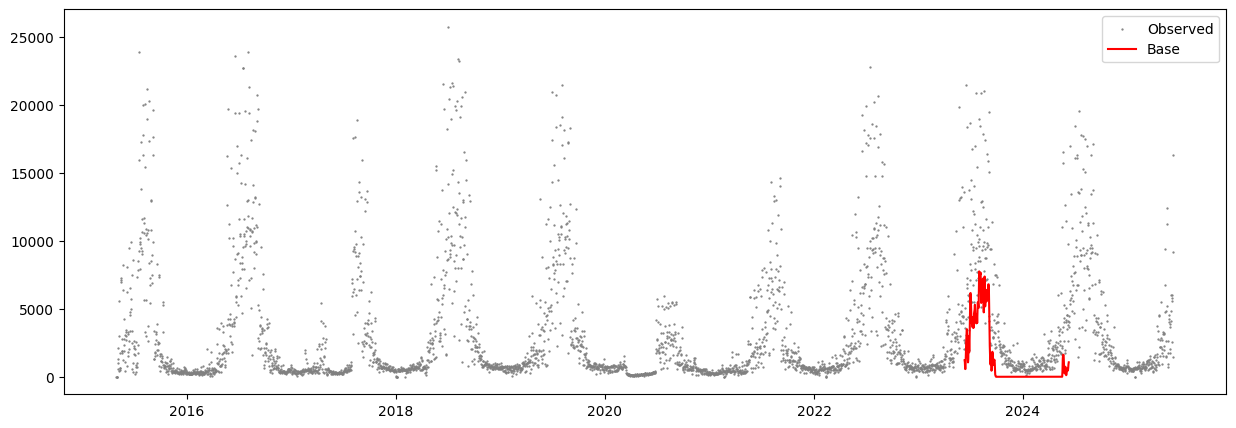

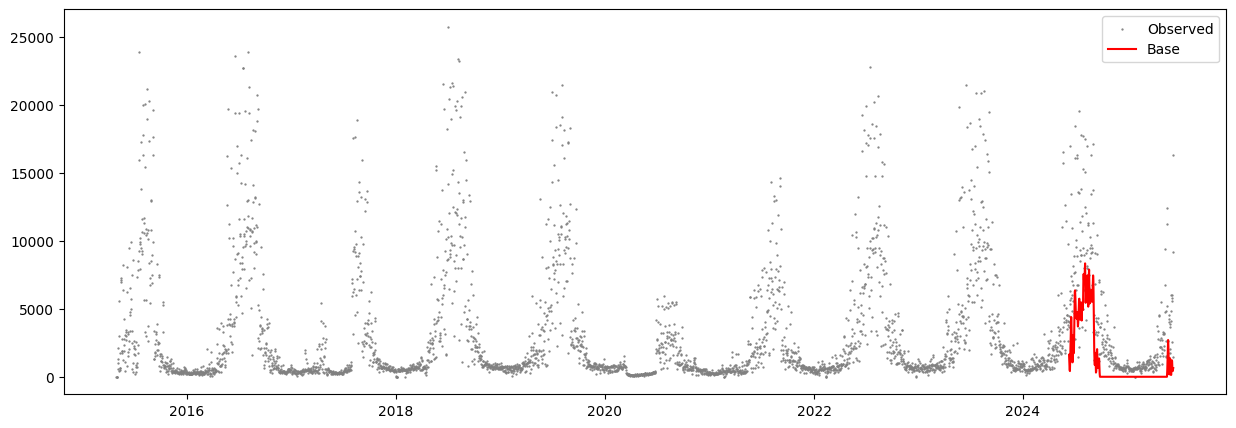

In [13]:
rm = RedemptionModel(df, 'Redemption Count')
rm.run_models()

In [14]:
# print model summary stats
rm.results

{'Base': {0: 0.8910202519219049,
  1: 0.8539109584185249,
  2: 0.849330111208266,
  3: 0.8575748114487485}}